In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001102112"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001102112
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,PACWEST BANCORP
Ticker,PACW


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,47.0,2.746702e+01,1.021829e+01,1.293000e+01,19.04,25.8,3.775500e+01,4.065000e+01
interest income,69.0,1.164697e+08,9.085499e+07,9.020000e+06,63341000.00,75123000.0,2.076720e+08,3.045590e+08
net income,69.0,2.042545e+07,8.085264e+07,-4.745140e+08,7233000.00,13494000.0,6.961600e+07,1.182760e+08
net interest income,48.0,1.257322e+08,9.403311e+07,6.080000e+06,51914000.00,70187000.0,2.327782e+08,2.629560e+08
provision for loan losses,69.0,9.873362e+06,2.003990e+07,-6.074000e+06,0.00,3500000.0,1.354700e+07,1.332270e+08


# Plots

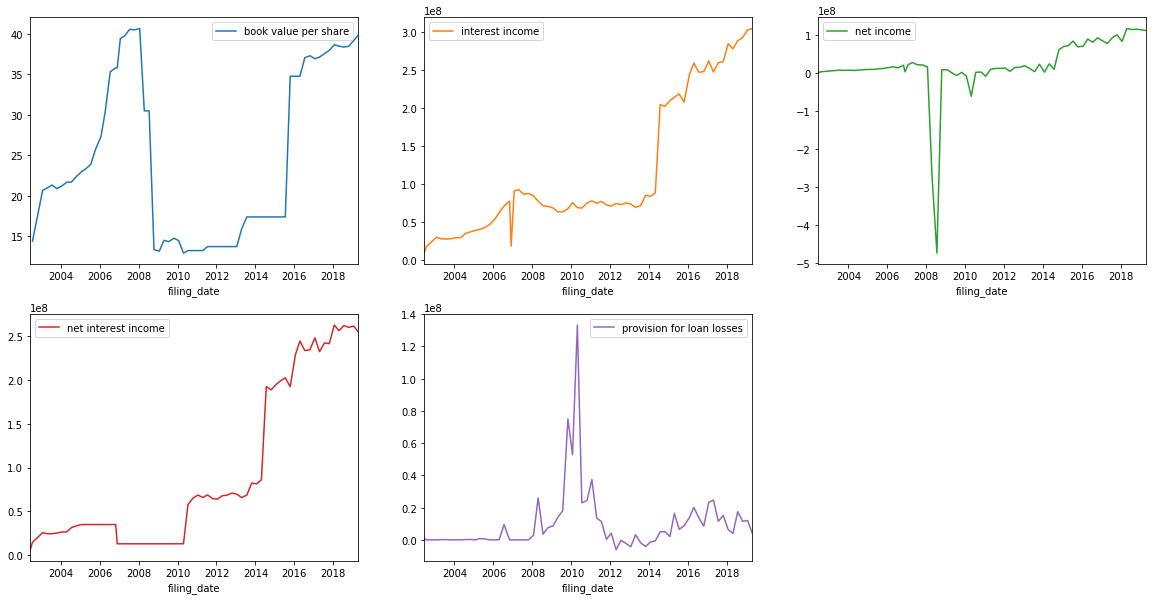

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0001102112 book value per share                             2002Q1    missing   
           book value per share                             2002Q3    missing   
           book value per share                             2008Q2    missing   
           book value per share        2010Q3 to 2011Q1: 3 periods    missing   
           book value per share        2011Q3 to 2012Q4: 6 periods    missing   
           book value per share        2013Q3 to 2015Q2: 8 periods    missing   
           book value per share        2015Q4 to 2016Q1: 2 periods    missing   
           interest income                                  2002Q3    missing   
           interest income                                  2006Q3  duplicate   
           net income                                       2002Q3    missing   
           net income                                       2006Q3  duplicate   
           net interest income                              2002Q3    missing   
           net interest income         2005Q1 to 2006Q2: 6 periods    missing   
           net interest income        2006Q4 to 2010Q1: 14 periods    missing   
           provision for loan losses                        2002Q3    missing   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0001102112 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income              Duplicate period  
           net income                     Missing period  
           net income                   Duplicate period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()